In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

In [55]:
df = pd.read_csv('ulazni_podaci_vsl2.csv')
df.head()

,Naziv_proteina,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,...,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y,Klasifikacija
0,AAD14585.1|virion spike glycoprotein precursor,0.0677,0.0262,0.0502,0.0524,0.0611,0.0852,0.0197,0.0786,0.0459,...,0.0459,0.0459,0.0371,0.0568,0.0328,0.0873,0.0568,0.0306,0.0284,uređen
1,AAD14585.1|virion spike glycoprotein precursor,0.0780,0.0000,0.0550,0.0550,0.0092,0.0642,0.0413,0.0275,0.0413,...,0.0734,0.0642,0.0459,0.0321,0.1514,0.1514,0.0413,0.0000,0.0092,neuređen
2,AAQ55048.1|virion spike glycoprotein precursor,0.0700,0.0263,0.0481,0.0525,0.0613,0.0853,0.0197,0.0788,0.0460,...,0.0460,0.0460,0.0372,0.0547,0.0328,0.0875,0.0569,0.0306,0.0284,uređen
3,AAQ55048.1|virion spike glycoprotein precursor,0.0822,0.0000,0.0548,0.0594,0.0046,0.0639,0.0411,0.0228,0.0411,...,0.0731,0.0776,0.0457,0.0411,0.1370,0.1507,0.0365,0.0000,0.0091,neuređen
4,ABX75367.1|virion spike glycoprotein precursor,0.0677,0.0262,0.0502,0.0524,0.0611,0.0852,0.0197,0.0786,0.0459,...,0.0459,0.0459,0.0371,0.0568,0.0328,0.0873,0.0568,0.0306,0.0284,uređen


In [56]:
df.any()

Naziv_proteina          True
molska_frakcija_za_A    True
molska_frakcija_za_C    True
molska_frakcija_za_D    True
molska_frakcija_za_E    True
molska_frakcija_za_F    True
molska_frakcija_za_G    True
molska_frakcija_za_H    True
molska_frakcija_za_I    True
molska_frakcija_za_K    True
molska_frakcija_za_L    True
molska_frakcija_za_M    True
molska_frakcija_za_N    True
molska_frakcija_za_P    True
molska_frakcija_za_Q    True
molska_frakcija_za_R    True
molska_frakcija_za_S    True
molska_frakcija_za_T    True
molska_frakcija_za_V    True
molska_frakcija_za_W    True
molska_frakcija_za_Y    True
Klasifikacija           True
dtype: bool

In [57]:
y = df['Klasifikacija']
X = df.drop(columns=['Naziv_proteina', 'Klasifikacija'], axis=1)

In [58]:
X.shape

(1278, 20)

In [59]:
y.shape

(1278,)

In [60]:
feature_names = X.columns
df[feature_names]

,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,molska_frakcija_za_L,molska_frakcija_za_M,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y
0,0.0677,0.0262,0.0502,0.0524,0.0611,0.0852,0.0197,0.0786,0.0459,0.0895,0.0022,0.0459,0.0459,0.0371,0.0568,0.0328,0.0873,0.0568,0.0306,0.0284
1,0.0780,0.0000,0.0550,0.0550,0.0092,0.0642,0.0413,0.0275,0.0413,0.0459,0.0138,0.0734,0.0642,0.0459,0.0321,0.1514,0.1514,0.0413,0.0000,0.0092
2,0.0700,0.0263,0.0481,0.0525,0.0613,0.0853,0.0197,0.0788,0.0460,0.0897,0.0022,0.0460,0.0460,0.0372,0.0547,0.0328,0.0875,0.0569,0.0306,0.0284
3,0.0822,0.0000,0.0548,0.0594,0.0046,0.0639,0.0411,0.0228,0.0411,0.0457,0.0137,0.0731,0.0776,0.0457,0.0411,0.1370,0.1507,0.0365,0.0000,0.0091
4,0.0677,0.0262,0.0502,0.0524,0.0611,0.0852,0.0197,0.0786,0.0459,0.0895,0.0022,0.0459,0.0459,0.0371,0.0568,0.0328,0.0873,0.0568,0.0306,0.0284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,0.0549,0.0000,0.0392,0.0627,0.0196,0.0471,0.0353,0.0275,0.0392,0.0510,0.0157,0.0627,0.1176,0.0471,0.0353,0.1255,0.1647,0.0510,0.0000,0.0039
1274,0.0579,0.0278,0.0486,0.0532,0.0602,0.0764,0.0255,0.0741,0.0486,0.0903,0.0046,0.0579,0.0463,0.0347,0.0440,0.0231,0.0926,0.0694,0.0324,0.0324
1275,0.0369,0.0000,0.0533,0.0615,0.0123,0.0287,0.0369,0.0287,0.0205,0.0533,0.0164,0.0738,0.1475,0.0451,0.0656,0.1066,0.1680,0.0410,0.0000,0.0041
1276,0.0758,0.0284,0.0379,0.0592,0.0592,0.0782,0.0213,0.0829,0.0403,0.0877,0.0047,0.0521,0.0379,0.0379,0.0592,0.0403,0.0782,0.0616,0.0355,0.0213


In [61]:
y.unique()

array(['uređen', 'neuređen'], dtype=object)

In [62]:
y.replace("uređen", 1, inplace=True)
y.replace("neuređen", 0, inplace = True)

/tmp/ipykernel_52528/439406901.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace("neuređen", 0, inplace = True)


In [63]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1273    0
1274    1
1275    0
1276    1
1277    0
Name: Klasifikacija, Length: 1278, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [65]:
#Cuvanje trening i test podataka u CSV datoteke
trening_podaci = pd.concat([X_train, y_train], axis=1)
test_podaci = pd.concat([X_test, y_test], axis=1)
trening_podaci.to_csv('Trening podaci/VSL2/trening_podaci_CART_vsl2.csv', index=False)
test_podaci.to_csv('Test podaci/VSL2/test_podaci_CART_vsl2.csv', index=False)

X_test_index = X_test.index  


In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [67]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion' : ['gini', 'entropy'],
           'max_depth' : [2,4,6,8]
         }

model = GridSearchCV(DecisionTreeClassifier(), params, scoring = 'accuracy', cv=5, verbose=2)

In [68]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy', verbose=2)

In [69]:
model.best_score_

1.0

In [70]:
model.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [71]:
best_model = model.best_estimator_

In [72]:
best_model

DecisionTreeClassifier(max_depth=2)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
y_pred_train = model.predict(X_train) 
confusion_matrix(y_train, y_pred_train)

array([[447,   0],
       [  0, 447]])

In [75]:
y_pred = model.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.9921875

In [77]:
confusion_matrix(y_test, y_pred)

array([[190,   2],
       [  1, 191]])

In [80]:
# CSV fajl sa predikcijama za test skup
X_test = pd.DataFrame(X_test, index=X_test_index, columns=feature_names)

test_podaci = X_test.copy()  
test_podaci['Naziv_proteina'] = df.loc[X_test.index, 'Naziv_proteina']  
test_podaci['Stvarna vrednost'] = y_test  # Stvarne vrednosti
test_podaci['Predviđena vrednost'] = y_pred  # Predviđene vrednosti

test_podaci['Stvarna vrednost'] = test_podaci['Stvarna vrednost'].replace({0: 'neuređeno', 1: 'uređeno'})
test_podaci['Predviđena vrednost'] = test_podaci['Predviđena vrednost'].replace({0: 'neuređeno', 1: 'uređeno'})

test_podaci.insert(0, 'Naziv_proteina', test_podaci.pop('Naziv_proteina'))

# CSV fajl sa predikcijama za test skup
test_podaci.to_csv('Predikcije test skupa/VSL2/predikcije_test_skupa_CART_vsl2.csv', index=False)

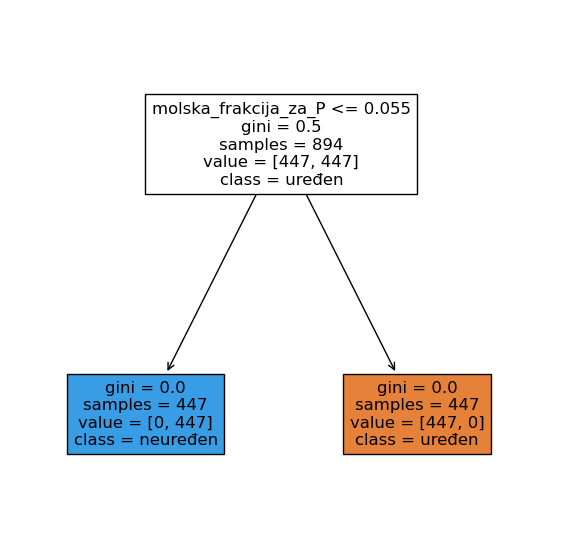

In [81]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 7))
plot_tree(best_model, class_names=['uređen', 'neuređen'], feature_names=feature_names, filled=True)
plt.show()